In [2]:
from gensim.models import Word2Vec
import codecs
import nltk
import re
import multiprocessing

In [42]:
filenames = ['datasets/el_pais/all_news.txt', 'datasets/el_pais/all_news2.txt', 
                  'datasets/el_pais/all_news3.txt', 'datasets/el_pais/all_news4.txt',
                 'datasets/folha/all_news.txt']

In [43]:
corpus_raw = u""
for filenames in filenames:
    print("Reading '{0}'...".format(filenames))
    with codecs.open(filenames, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))

Reading 'datasets/el_pais/all_news.txt'...
Corpus is now 2217835 characters long
Reading 'datasets/el_pais/all_news2.txt'...
Corpus is now 4407384 characters long
Reading 'datasets/el_pais/all_news3.txt'...
Corpus is now 5466038 characters long
Reading 'datasets/el_pais/all_news4.txt'...
Corpus is now 6173125 characters long
Reading 'datasets/folha/all_news.txt'...
Corpus is now 6554289 characters long


#### Lower Case Letters

In [44]:
corpus_raw = corpus_raw.lower()

#### Tokenize

In [45]:
tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)

#### Remove Ponctuations

In [46]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Zçáíúéóàêôãõ]"," ", raw)
    words = clean.split()
    return words

In [47]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [48]:
token_count = sum([len(s) for s in sentences])
print("The book corpus contains {0:,} words".format(token_count))

The book corpus contains 1,065,301 words


#### Remove Stopwords

In [49]:
text_file = open("datasets/stopwords.txt", "r")
lines = text_file.readlines()
lines = list(map(lambda x: x.replace('\n','').replace(' ',''), lines))

In [50]:
new_sentences = []

In [51]:
for s in sentences:
    new_sentences.append(list(filter(lambda x: x not in lines , s)))

In [52]:
print(new_sentences[0])

['nova', 'pesquisa', 'datafolha', 'divulgada', 'noite', 'desta', 'sexta', 'feira', 'confirma', 'tendências', 'apontadas', 'outras', 'pesquisas', 'fernando', 'haddad', 'pt', 'segue', 'ascensão', 'desta', 'vez', 'pontos', 'além', 'último', 'levantamento']


In [53]:
token_count = sum([len(sentence) for sentence in new_sentences])
print("The book corpus contains {0:,} words".format(token_count))

The book corpus contains 596,840 words


### Train model CBOW

In [54]:
# Dimensionality of Word Vectors
# More dimensions, more computationally expensive to train but also more accurate
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
# More workers == More faster
num_workers = multiprocessing.cpu_count()
print(num_workers)

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
# random number generator
# deterministic, good for debugging
seed = 1

4


model_cbow2vec = w2v.Word2Vec(
    sg=0,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [55]:
cbow_model = Word2Vec(new_sentences, min_count=1)

In [56]:
# summarize the loaded model
print(cbow_model)


Word2Vec(vocab=38727, size=100, alpha=0.025)


In [57]:
# summarize vocabulary
words = list(cbow_model.wv.vocab)
print(len(words))

38727


In [58]:
# access vector for one word
print(cbow_model['lula'])

[ 0.01776369 -0.07767554  0.8258348  -1.4917374   0.11953779  1.353575
 -1.1147709  -1.3729991  -1.666766    0.9289592   0.46448323  0.98850644
 -0.3268505  -0.07616705  1.825779   -0.26446214  0.4520726  -0.43432644
 -0.2459668   2.8161871   0.11814233  1.4009048   0.08892489 -0.09970405
  0.9649301   0.5613889  -0.24692887 -1.5942872  -1.4175665   0.60619146
  0.02501249 -1.5032758   0.48270565  0.7514214  -1.2959366  -1.0079168
  1.2412854   0.26621857  0.5824142   0.59280753 -1.2522815   1.0483022
  0.11138061 -0.58251375 -0.01149576 -1.8363575  -0.0414638   0.28332588
  0.7563216  -0.7787064  -2.0597358   0.55030984  0.9620052  -0.27553836
 -1.672637   -1.6168056  -1.3124524   0.42598256  0.6281272  -0.34935248
 -1.7063063  -0.20741126 -1.3369474   1.7916676   1.1175777  -0.58566403
 -0.4067863   0.05603557  0.126676    0.92998886  0.10986372 -0.64511377
  0.5950315   1.10667     1.3668363   0.79146427  2.0793364  -0.5314923
  0.28835854  0.2998351  -0.106025    1.1690584   0.2985

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [59]:
# save model
cbow_model.save('trained/cbow-gensin.bin')


### Train Skip Gram Model

In [60]:
sg_model = Word2Vec(new_sentences, min_count=1, sg=1)

In [61]:
sg_model.save('trained/sg-gensin.bin')

In [62]:
sg_model = Word2Vec.load('trained/sg-gensin.bin')
print(sg_model)

Word2Vec(vocab=38727, size=100, alpha=0.025)


### ------------- Analyse Data -------------

In [3]:
# load model
cbow_model = Word2Vec.load('trained/cbow-gensin.bin')
print(cbow_model)

Word2Vec(vocab=38727, size=100, alpha=0.025)


#### Visualize Data

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
X = cbow_model[cbow_model.wv.vocab]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [6]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [7]:
import plotly
import plotly.tools as tls
plotly.tools.set_credentials_file(username='carolsilva', api_key='uHnBhrhTZwLsFxyhY2vr')

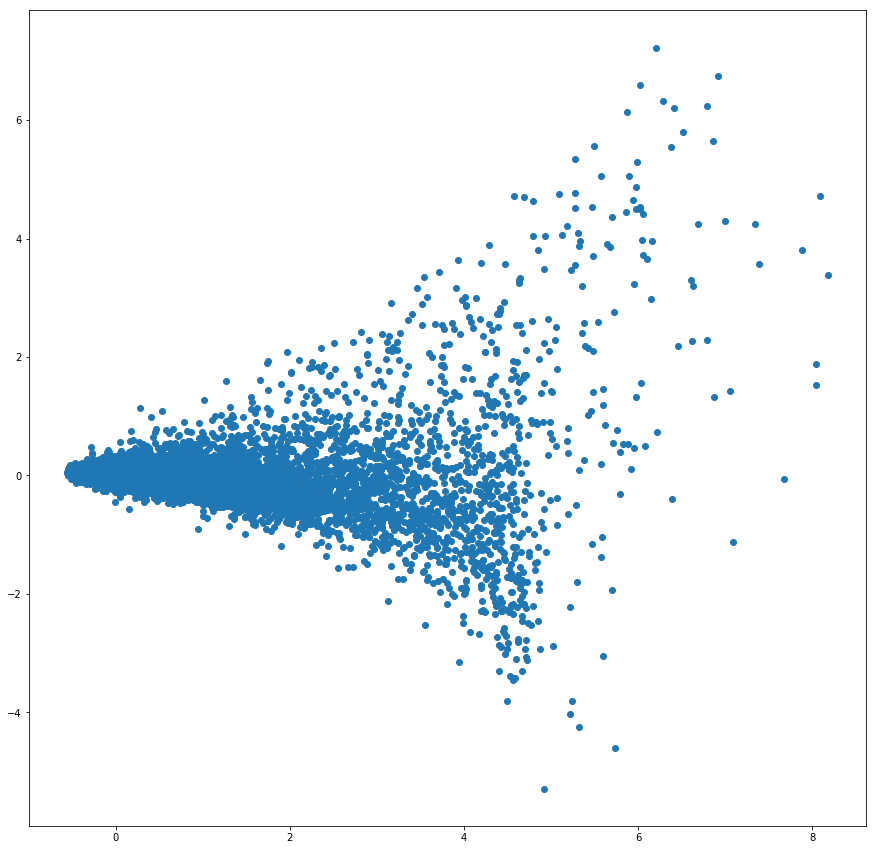

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(result[:, 0], result[:, 1])

In [14]:
# create a scatter plot of the projection
words = list(cbow_model.wv.vocab)
for i, word in enumerate(words):
    ax.annotate(word, xy=(result[i, 0], result[i, 1]))

In [ ]:
fig.show()

In [ ]:
# plotly_fig = tls.mpl_to_plotly(fig)

In [13]:
plotly.plotly.iplot(plotly_fig, filename = 'mpl-basic-scatter-plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~carolsilva/0 or inside your plot.ly account where it is named 'mpl-basic-scatter-plot'


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [18]:
cbow_model.most_similar('lula')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('petista', 0.9412335753440857),
 ('impugnada', 0.9352678060531616),
 ('inácio', 0.9330307245254517),
 ('declare', 0.9311180114746094),
 ('caiba', 0.9282867908477783),
 ('preso', 0.9120083451271057),
 ('inelegível', 0.9098989963531494),
 ('livrá', 0.9070641994476318),
 ('substituí', 0.9046914577484131),
 ('candidatura', 0.9045298099517822)]